In [1]:
# libraries required
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer 
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
data = pd.read_excel('Strikers_performance.xlsx')

In [3]:
data.isnull().sum()

Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement off the Ball         6
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          2
Consistency                   0
Penalty Success Rate          5
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64

In [4]:
imputer = SimpleImputer(strategy = 'median')
data[['Movement off the Ball','Big Game Performance','Penalty Success Rate']] = imputer.fit_transform(data[['Movement off the Ball','Big Game Performance','Penalty Success Rate']])


In [5]:
data.isnull().sum()

Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement off the Ball         0
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          0
Consistency                   0
Penalty Success Rate          0
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64

In [6]:
data.dtypes


Striker_ID                      int64
Nationality                    object
Footedness                     object
Marital Status                 object
Goals Scored                  float64
Assists                       float64
Shots on Target               float64
Shot Accuracy                 float64
Conversion Rate               float64
Dribbling Success             float64
Movement off the Ball         float64
Hold-up Play                  float64
Aerial Duels Won              float64
Defensive Contribution        float64
Big Game Performance          float64
Consistency                   float64
Penalty Success Rate          float64
Impact on Team Performance    float64
Off-field Conduct             float64
dtype: object

In [7]:
data[['Goals Scored', 'Assists', 'Shots on Target', 'Movement off the Ball',
    'Hold-up Play', 'Aerial Duels Won', 'Defensive Contribution',
    'Big Game Performance', 'Impact on Team Performance', 'Off-field Conduct']] = data[['Goals Scored', 'Assists', 'Shots on Target', 'Movement off the Ball',
    'Hold-up Play', 'Aerial Duels Won', 'Defensive Contribution',
    'Big Game Performance', 'Impact on Team Performance', 'Off-field Conduct']].astype('int64')

In [8]:
round(data.describe(),2)

,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,14.52,7.60,25.26,0.60,0.20,0.70,69.28,59.33,19.04,39.47,6.43,0.74,0.80,6.52,7.57
std,144.48,4.91,2.96,7.08,0.10,0.05,0.10,10.33,10.15,4.95,9.90,1.98,0.10,0.10,2.11,2.09
min,1.00,0.00,0.00,4.00,0.31,0.05,0.40,40.00,35.00,4.00,8.00,2.00,0.46,0.53,0.00,0.00
25%,125.75,11.00,6.00,20.00,0.54,0.17,0.64,62.00,52.00,16.00,33.00,5.00,0.68,0.72,5.00,6.00
50%,250.50,15.00,8.00,25.00,0.60,0.20,0.70,69.00,60.00,19.00,39.50,6.00,0.75,0.80,6.50,8.00
75%,375.25,18.00,9.00,30.00,0.67,0.23,0.76,76.00,66.00,22.00,46.00,8.00,0.81,0.87,8.00,9.00
max,500.00,34.00,15.00,43.00,0.92,0.36,1.00,98.00,92.00,34.00,71.00,12.00,1.00,1.00,13.00,13.00


In [9]:
foot_counts = data['Footedness'].value_counts()
foot_counts

Footedness
Right-footed    267
Left-footed     233
Name: count, dtype: int64

In [10]:
foot_counts_perc = foot_counts / len( data['Footedness']) * 100
foot_counts_perc

Footedness
Right-footed    53.4
Left-footed     46.6
Name: count, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

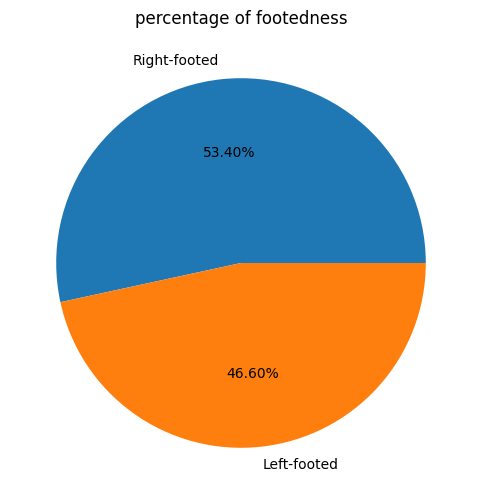

In [11]:
plt.figure(figsize=(12,6))
foot_counts_perc.plot(kind = 'pie', autopct = '%1.2f%%')
plt.ylabel('')
plt.title('percentage of footedness')
plt.show

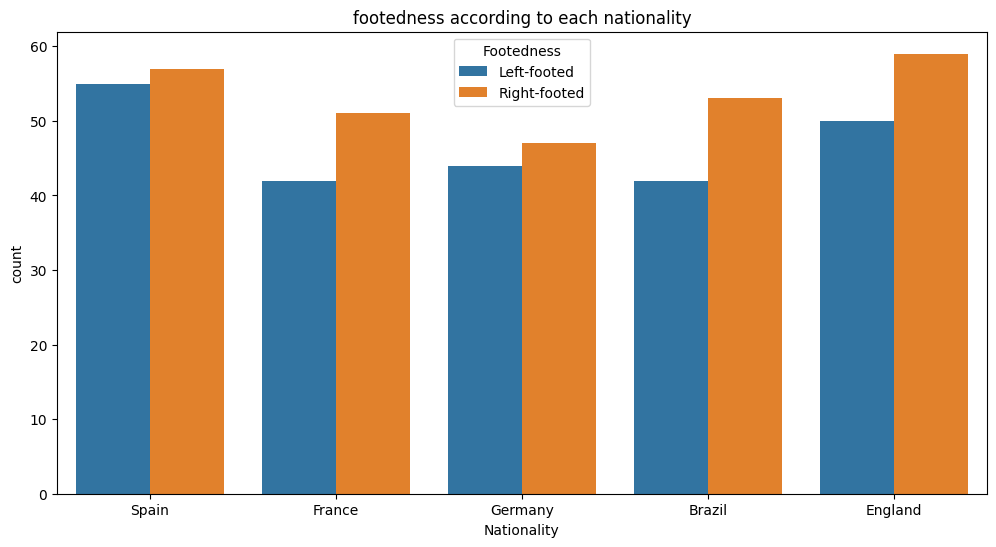

In [12]:
plt.figure(figsize =(12,6))
sns.countplot(x = 'Nationality', hue = 'Footedness', data = data)
plt.xlabel('Nationality')
plt.title('footedness according to each nationality')
plt.show()

In [13]:
avg_goal_country = data.groupby('Nationality')['Goals Scored'].mean()
avg_goal_country

Nationality
Brazil     15.315789
England    13.899083
France     14.408602
Germany    14.351648
Spain      14.687500
Name: Goals Scored, dtype: float64

In [14]:
foot_conv_rate = data.groupby('Footedness')['Conversion Rate'].mean()
foot_conv_rate * 100

Footedness
Left-footed     19.808556
Right-footed    20.059234
Name: Conversion Rate, dtype: float64

In [15]:
data.head()


,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17,10,34,0.677836,0.166241,0.757061,50,71,15,30,6,0.820314,0.922727,8,11
1,2,France,Left-footed,Yes,14,13,31,0.544881,0.192774,0.796818,61,53,19,26,6,0.803321,0.678984,3,8
2,3,Germany,Left-footed,No,18,3,25,0.518180,0.160379,0.666869,65,60,20,24,3,0.766540,0.843858,8,9
3,4,France,Right-footed,No,22,9,20,0.599663,0.184602,0.638776,88,60,22,44,6,0.611798,0.662997,6,8
4,5,France,Left-footed,Yes,13,6,29,0.582982,0.105319,0.591485,75,54,13,37,8,0.701638,0.906538,8,6


In [16]:
stat,p_value = shapiro(data['Consistency'])
normality_Consistency = round(p_value,2)

normality_Consistencystat,p_value = shapiro(data['Consistency'])

In [17]:

spain_consistency = data[data['Nationality']== 'Spain']['Consistency']
france_consistency = data[data['Nationality']== 'France']['Consistency']
germany_consistency = data[data['Nationality']== 'Germany']['Consistency']
brazil_consistency = data[data['Nationality']== 'Brazil']['Consistency']
england_consistency = data[data['Nationality']== 'England']['Consistency']

stat,p_value = levene(spain_consistency,france_consistency,germany_consistency,brazil_consistency,england_consistency)
levene_result = p_value
levene_result 

np.float64(0.8083990350934653)

In [18]:
stat,p_value = f_oneway(spain_consistency,france_consistency,germany_consistency,brazil_consistency,england_consistency)
oneway_anova = p_value
oneway_anova

np.float64(0.19278675901599154)

In [19]:
data.dtypes

Striker_ID                      int64
Nationality                    object
Footedness                     object
Marital Status                 object
Goals Scored                    int64
Assists                         int64
Shots on Target                 int64
Shot Accuracy                 float64
Conversion Rate               float64
Dribbling Success             float64
Movement off the Ball           int64
Hold-up Play                    int64
Aerial Duels Won                int64
Defensive Contribution          int64
Big Game Performance            int64
Consistency                   float64
Penalty Success Rate          float64
Impact on Team Performance      int64
Off-field Conduct               int64
dtype: object

In [20]:
stat,p_value = pearsonr(data['Consistency'],data['Hold-up Play'])
pearsons_result = p_value
pearsons_result

np.float64(0.0010146963053630409)

In [21]:
#feaute engineering 
data['Total contribution score'] = data['Goals Scored'] + data['Assists'] + data['Shots on Target'] + data['Dribbling Success'] + data['Aerial Duels Won'] + data['Defensive Contribution'] + data['Big Game Performance'] + data['Consistency']
data['Total contribution score']

0      113.577376
1      110.600139
2       94.433410
3      124.250575
4      107.293123
          ...    
495    135.474895
496    130.591040
497    158.204084
498    108.530213
499    102.317446
Name: Total contribution score, Length: 500, dtype: float64

In [22]:
#label encoding
encoder = LabelEncoder()
data['Footedness'] = encoder.fit_transform(data['Footedness'])
data['Marital Status'] = encoder.fit_transform(data['Marital Status'])



In [23]:
data.head()


,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,50,71,15,30,6,0.820314,0.922727,8,11,113.577376
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,61,53,19,26,6,0.803321,0.678984,3,8,110.600139
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,65,60,20,24,3,0.766540,0.843858,8,9,94.433410
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,88,60,22,44,6,0.611798,0.662997,6,8,124.250575
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,75,54,13,37,8,0.701638,0.906538,8,6,107.293123


In [24]:
dummies = pd.get_dummies(data[['Nationality']])
data = pd.concat([data,dummies],axis = 1)
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,...,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,...,0.820314,0.922727,8,11,113.577376,False,False,False,False,True
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,...,0.803321,0.678984,3,8,110.600139,False,False,True,False,False
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,...,0.766540,0.843858,8,9,94.433410,False,False,False,True,False
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,...,0.611798,0.662997,6,8,124.250575,False,False,True,False,False
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,...,0.701638,0.906538,8,6,107.293123,False,False,True,False,False


In [25]:
data['Nationality_Brazil'] = encoder.fit_transform(data['Nationality_Brazil'])
data['Nationality_England'] = encoder.fit_transform(data['Nationality_England'])
data['Nationality_France'] = encoder.fit_transform(data['Nationality_France'])
data['Nationality_Germany'] = encoder.fit_transform(data['Nationality_Germany'])
data['Nationality_Spain'] = encoder.fit_transform(data['Nationality_Spain'])
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,...,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,...,0.820314,0.922727,8,11,113.577376,0,0,0,0,1
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,...,0.803321,0.678984,3,8,110.600139,0,0,1,0,0
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,...,0.766540,0.843858,8,9,94.433410,0,0,0,1,0
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,...,0.611798,0.662997,6,8,124.250575,0,0,1,0,0
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,...,0.701638,0.906538,8,6,107.293123,0,0,1,0,0


In [26]:
#k-means clustering

x = data.drop(['Nationality', 'Striker_ID'], axis=1)
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters= i , init = 'k-means++')
    kmeans.fit(x)
    wcss_score = kmeans.inertia_
    wcss.append(wcss_score) 
    

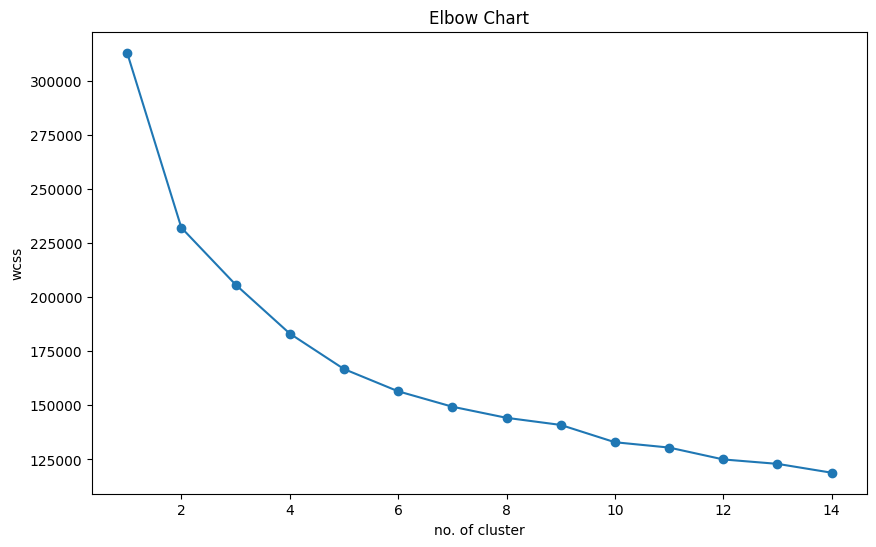

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),wcss,marker = 'o')
plt.title('Elbow Chart')
plt.xlabel('no. of cluster')
plt.ylabel('wcss')
plt.show()

In [28]:
final_km = KMeans(n_clusters = 2)
final_km.fit_transform(x)
labels = final_km.labels_
labels

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,

In [29]:
x['clusters'] = labels
x.head()

,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,clusters
0,0,0,17,10,34,0.677836,0.166241,0.757061,50,71,...,0.922727,8,11,113.577376,0,0,0,0,1,1
1,0,1,14,13,31,0.544881,0.192774,0.796818,61,53,...,0.678984,3,8,110.600139,0,0,1,0,0,1
2,0,0,18,3,25,0.518180,0.160379,0.666869,65,60,...,0.843858,8,9,94.433410,0,0,0,1,0,1
3,1,0,22,9,20,0.599663,0.184602,0.638776,88,60,...,0.662997,6,8,124.250575,0,0,1,0,0,0
4,0,1,13,6,29,0.582982,0.105319,0.591485,75,54,...,0.906538,8,6,107.293123,0,0,1,0,0,1


In [30]:
round(x.groupby('clusters')['Total contribution score'].mean(),2)

clusters
0    123.57
1    102.15
Name: Total contribution score, dtype: float64

In [31]:
x['Striker Type'] = x['clusters'].map({0: 'Best Striker' , 1:'Regular Striker'})
x.head()

,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,...,Impact on Team Performance,Off-field Conduct,Total contribution score,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,clusters,Striker Type
0,0,0,17,10,34,0.677836,0.166241,0.757061,50,71,...,8,11,113.577376,0,0,0,0,1,1,Regular Striker
1,0,1,14,13,31,0.544881,0.192774,0.796818,61,53,...,3,8,110.600139,0,0,1,0,0,1,Regular Striker
2,0,0,18,3,25,0.518180,0.160379,0.666869,65,60,...,8,9,94.433410,0,0,0,1,0,1,Regular Striker
3,1,0,22,9,20,0.599663,0.184602,0.638776,88,60,...,6,8,124.250575,0,0,1,0,0,0,Best Striker
4,0,1,13,6,29,0.582982,0.105319,0.591485,75,54,...,8,6,107.293123,0,0,1,0,0,1,Regular Striker


In [32]:
x['Striker Type'].unique()

array(['Regular Striker', 'Best Striker'], dtype=object)

In [33]:
x['clusters'] = labels
x['Striker Type'] = x['clusters'].map({0: 0, 1: 1})
x.head()

,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,...,Impact on Team Performance,Off-field Conduct,Total contribution score,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,clusters,Striker Type
0,0,0,17,10,34,0.677836,0.166241,0.757061,50,71,...,8,11,113.577376,0,0,0,0,1,1,1
1,0,1,14,13,31,0.544881,0.192774,0.796818,61,53,...,3,8,110.600139,0,0,1,0,0,1,1
2,0,0,18,3,25,0.518180,0.160379,0.666869,65,60,...,8,9,94.433410,0,0,0,1,0,1,1
3,1,0,22,9,20,0.599663,0.184602,0.638776,88,60,...,6,8,124.250575,0,0,1,0,0,0,0
4,0,1,13,6,29,0.582982,0.105319,0.591485,75,54,...,8,6,107.293123,0,0,1,0,0,1,1


In [34]:
x_data = x
x = x.drop('clusters',axis=1)
x.head()

,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,Striker Type
0,0,0,17,10,34,0.677836,0.166241,0.757061,50,71,...,0.922727,8,11,113.577376,0,0,0,0,1,1
1,0,1,14,13,31,0.544881,0.192774,0.796818,61,53,...,0.678984,3,8,110.600139,0,0,1,0,0,1
2,0,0,18,3,25,0.518180,0.160379,0.666869,65,60,...,0.843858,8,9,94.433410,0,0,0,1,0,1
3,1,0,22,9,20,0.599663,0.184602,0.638776,88,60,...,0.662997,6,8,124.250575,0,0,1,0,0,0
4,0,1,13,6,29,0.582982,0.105319,0.591485,75,54,...,0.906538,8,6,107.293123,0,0,1,0,0,1


In [35]:
#logistic regression model

x1 = x.drop('Striker Type', axis=1)
y = x['Striker Type']
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x1)
x_scaled

array([[-1.07047781, -1.03252879,  0.5050467 , ..., -0.47801802,
        -0.47169258,  1.86125917],
       [-1.07047781,  0.968496  , -0.10638998, ...,  2.09197134,
        -0.47169258, -0.53727069],
       [-1.07047781, -1.03252879,  0.70885893, ..., -0.47801802,
         2.12002488, -0.53727069],
       ...,
       [-1.07047781,  0.968496  , -0.10638998, ..., -0.47801802,
        -0.47169258, -0.53727069],
       [ 0.93416229,  0.968496  , -0.9216389 , ..., -0.47801802,
        -0.47169258, -0.53727069],
       [-1.07047781, -1.03252879, -1.32926335, ..., -0.47801802,
        -0.47169258, -0.53727069]], shape=(500, 23))

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2 , random_state = 42)
model = LogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_pred,y_test)
print(accuracy*100,'%')

96.0 %


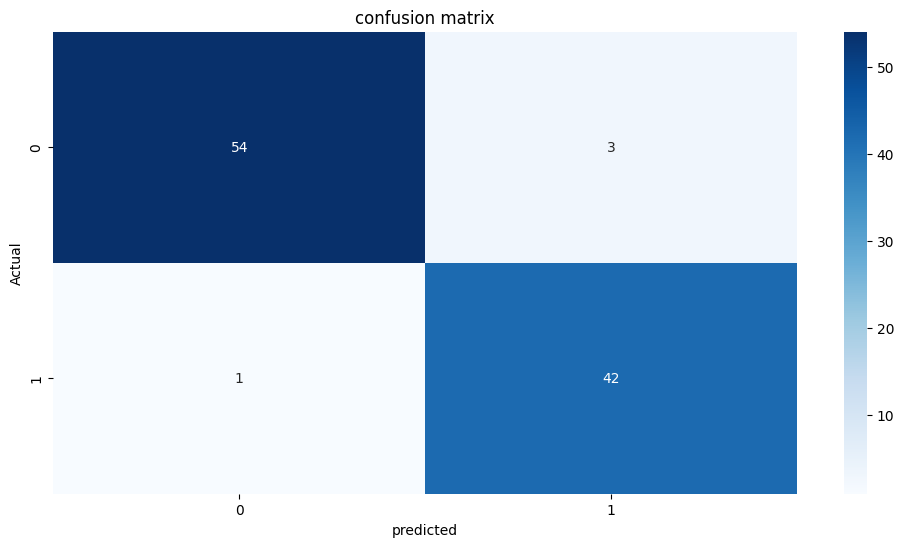

In [38]:
confusion_matrix_ = confusion_matrix(y_pred,y_test)

plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix_,annot = True,fmt = 'd',cmap='Blues')
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#questions and Answers

In [ ]:
#1. What is the maximum goal scored by an individual striker?
data['Goals Scored'].max() #Answer: 34

In [ ]:
# 2.What is the portion of Right-footed strikers within the dataset?
(data['Footedness'] == 1 ).sum() / len(data) * 100 #Answer: 53.4 ( 0: Left-footed , 1:Right-footed)


In [ ]:
#3. Which nationality strikers have the highest average number of goals scored?
data.groupby('Nationality')['Goals Scored'].mean().idxmax() #Answer:Brazil


In [ ]:
# 4. What is the average conversion rate for left-footed players?
data[data['Footedness'] == 0]['Conversion Rate'].mean() #Answer:0.19808556 ( 0: Left-footed , 1:Right-footed)


In [ ]:
#5. How many left footed players are from France?
data[(data['Footedness'] == 0) & (data['Nationality'] == 'France')].shape[0] #Answer : 42 ( 0: Left-footed , 1:Right-footed)



In [ ]:
#6. What is the correlation coefficient between Hold-up play and consistency score?
data['Hold-up Play'].corr(data['Consistency']) :Answer : 0.14654573283554154



In [ ]:
#7. What is the p-value for the Shapiro Wilk test of consistency score? Is it normally distributed?
shapiro(data['Consistency'])
#Answer : p_value : 0.45 , Since p > 0.05, we fail to reject the null hypothesis —  
#✅ The Consistency Score is **normally distributed**

In [ ]:
#8. What is the p-value for Levene's test of ANOVA analysis? Is heteroscedasticity assumed?
levene(spain_consistency,france_consistency,germany_consistency,brazil_consistency,england_consistency)
#Answer:0.808 , Since p_value >0.05 ,✅ Equal variance assumed (homoscedastic)

In [ ]:
#9. Is there any significant correlation between strikers' Hold-up play and consistency rate?
pearsonr(data['Hold-up Play'], data['Consistency'])
# Answer:  p-value: 0.001 ,Since p < 0.05, the correlation is statistically significant ✅

In [ ]:
#10. Describe the beta value of Hold-up Play you found in regression analysis.
import statsmodels.api as sm
x = sm.add_constant(data['Hold-up Play'])
model = sm.OLS(data['Consistency'], x).fit()
model.summary()
#Answer : Beta Value : 0.0015 (Beta value = coefficient of ‘Hold-up Play’ in regression output.)


In [ ]:
#11. What is the average Total contribution score you get for the best strikers?
x_data['Total contribution score'] = data['Total contribution score']
x_data[x_data['Striker Type'] == 1]['Total contribution score'].mean()
#Answer : 123.38653896127332

In [40]:
#12.What is the accuracy score of your Logistic Regression (LGR) model?
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy * 100:.2f}%") #Answer:96%
#How many regular strikers your model predicted correctly?
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
#Answer : Confusion Matrix:
 #[[54  1]
 #[ 3 42]]
#How many best strikers your model predicted incorrectly?
#Answer is 3 (refer confusion matrix graph)



Accuracy Score: 96.00%
Confusion Matrix:
 [[54  1]
 [ 3 42]]


In [42]:
# 1. Save the cleaned and updated full dataset
data.to_excel("strikers_cleaned_data.xlsx", index=False)

# 2. Save the model feature set used for ML
x.to_excel("model_features_x.xlsx", index=False)

# 3. Save the x_data used for final analysis and Q&A
x_data.to_excel("final_analysis_x_data.xlsx", index=False)

